In [1]:
# Checking for any warning
import warnings
warnings.filterwarnings('ignore')
import pyttsx3 as pyt

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [3]:
Root_dir = r"C:\saanvi_code\Boot_camp\Project\data\brain_tumor_dataset"
number_of_images = {}
py = pyt.init()

In [4]:
for dir in os.listdir(Root_dir):
    number_of_images[dir] = len( os.listdir(os.path.join(Root_dir,dir)))
number_of_images.items()

dict_items([('Brain Tumor', 16), ('Healthy', 17)])

# We will split the data such that
    * 70% for train data
    * 15% for validation 
    * 15% for Testing

In [5]:
def Data (p, split):

    if not os.path.exists("./"+p):
        os.mkdir("./"+p)

        for dir in os.listdir(Root_dir):
            os.makedirs("./"+p+"/"+dir)
            for img in np.random.choice(a=os.listdir(os.path.join(Root_dir,dir)), 
                                    size= (math.floor(split*number_of_images[dir])-5), 
                                    replace = False):
                O = os.path.join(Root_dir, dir,img)
                D = os.path.join('./'+p, dir)
                shutil.copy(O,D)
                os.remove(O)
    else:
        print(f"The {p} folder Exists")
        py.say(f"The {p} folder Exists")
        py.runAndWait()
    

In [6]:
Data ("Train", 0.7)


The Train folder Exists


In [7]:
Data ("Validation", 0.15)

The Validation folder Exists


In [8]:
Data ("Test", 0.15)

The Test folder Exists


In [9]:
number_of_images = {}
for dir in os.listdir(Root_dir):
    number_of_images[dir] = len( os.listdir(os.path.join(Root_dir,dir)))
number_of_images.items()

dict_items([('Brain Tumor', 16), ('Healthy', 17)])

Model Build

In [10]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization,GlobalAvgPool2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras

In [11]:
#CNN Model
model = Sequential()
model.add(Conv2D(filters= 16, kernel_size=(3,3), activation='relu', input_shape= (224,224,3)))

model.add(Conv2D(filters= 36, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters= 128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))
model.add (Flatten())

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(units = 1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 36)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 128)     41600     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 54, 54, 128)       0

In [12]:
model.compile(optimizer = 'adam', loss = keras.losses.binary_crossentropy, metrics=['accuracy'])

In [13]:
def preprocessingImgsTrain(path):
    image_data = ImageDataGenerator(zoom_range= 0.2, shear_range=0.2, rescale= 1/255, horizontal_flip= True)
    image = image_data.flow_from_directory(directory = path, target_size=(224,224), batch_size = 30, class_mode = 'binary')
    return image

In [14]:
path = './Train'
train_data = preprocessingImgsTrain(path)

Found 3386 images belonging to 2 classes.


In [15]:
def preprocessingImgsTestAndVal(path):
    image_data = ImageDataGenerator(rescale=1/255)
    image = image_data.flow_from_directory(directory = path, target_size=(224,224), batch_size = 30, class_mode = 'binary')
    return image

In [16]:
path = './Test'
test_data = preprocessingImgsTestAndVal(path)

Found 717 images belonging to 2 classes.


In [17]:
path = './Validation'
val_data = preprocessingImgsTestAndVal(path)

Found 717 images belonging to 2 classes.


In [18]:
# Early Stoping and model check point
from keras.callbacks import ModelCheckpoint, EarlyStopping
#Early Stoping
Es = EarlyStopping(monitor='val_accuracy', min_delta= 0.05, patience=7, verbose=1, mode = 'auto')
mc = ModelCheckpoint(monitor='val_accuracy', filepath= "./bestmodel.h5", verbose=1,save_best_only= True , mode = 'auto' )
cd= [Es,mc]

## Model Training

In [36]:
his = model.fit(train_data,
                    steps_per_epoch=train_data.samples // train_data.batch_size,
                    epochs=50,
                    verbose=1,
                    validation_data=val_data,
                    validation_steps=val_data.samples // val_data.batch_size,
                    callbacks=cd)


Epoch 1/50
112/112 [==============================] - ETA: 0s - loss: 0.7855 - accuracy: 0.6332
Epoch 1: val_accuracy improved from -inf to 0.76667, saving model to ./bestmodel.h5
112/112 [==============================] - 114s 1s/step - loss: 0.7855 - accuracy: 0.6332 - val_loss: 0.5069 - val_accuracy: 0.7667
Epoch 2/50
112/112 [==============================] - ETA: 0s - loss: 0.5458 - accuracy: 0.7303
Epoch 2: val_accuracy improved from 0.76667 to 0.82609, saving model to ./bestmodel.h5
112/112 [==============================] - 113s 1s/step - loss: 0.5458 - accuracy: 0.7303 - val_loss: 0.4244 - val_accuracy: 0.8261
Epoch 3/50
112/112 [==============================] - ETA: 0s - loss: 0.4776 - accuracy: 0.7837
Epoch 3: val_accuracy improved from 0.82609 to 0.83333, saving model to ./bestmodel.h5
112/112 [==============================] - 115s 1s/step - loss: 0.4776 - accuracy: 0.7837 - val_loss: 0.4113 - val_accuracy: 0.8333
Epoch 4/50
112/112 [==============================] - ETA:

In [37]:
h=his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

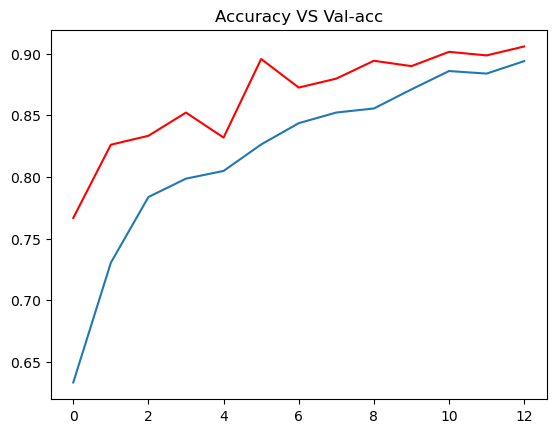

In [38]:
import matplotlib.pyplot as plt
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c= 'red')
plt.title("Accuracy VS Val-acc")
plt.show()

Text(0.5, 1.0, 'loss VS Val-loss')

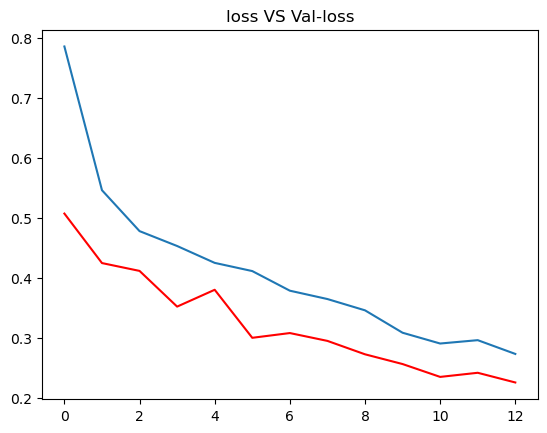

In [39]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c= 'red')
plt.title("loss VS Val-loss")

# Model Accuracy

In [19]:
#model Accuracy
from keras.models import load_model
model = load_model("./bestmodel.h5")

In [20]:
acc = model.evaluate_generator(test_data)[1]
print(f"The Accuracy of model is {acc*100}%")

The Accuracy of model is 91.91073775291443%


In [21]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

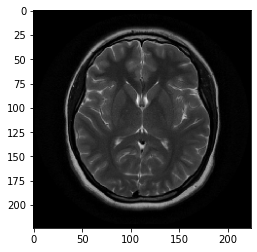

1/1 [==============================] - 0s 155ms/step
[[0.9998824]]
The Image Does Not Contains A Tumour


In [84]:
def predict_tumour (path):
    path = r"C:\saanvi_code\Boot_camp\Project\Validation\Healthy\1 no.jpeg"
    image = load_img(path, target_size=(224,224))
    input_arr= img_to_array(image)/255
    plt.imshow(input_arr)
    plt.show()
    input_arr.shape
    inputArray = np.expand_dims(input_arr, axis=0)  # Add batch dimension
    pred = model.predict(inputArray)  # Use inputArray with batch dimension
    pred_classes = np.argmax(pred, axis=1)
    print(pred)
    if pred >= 0.5:
        print("The Image Does Not Contains A Tumour")
    else:
        print ("The Image Does Contain A Tumour")

In [ ]:
train_data.class_indices

{'Brain Tumor': 0, 'Healthy': 1}